# Local Reality and the CHSH inequality

We have seen in a previous module how quantum entanglement results in strong correlations in a multi-partite system. In fact these correlations appear to be stronger than anything that could be explained using classical physics. 

The historical development of quantum mechanics is filled with agitated discussions about the true nature of reality and the extent to which quantum mechanics can explain it. Given the spectacular empirical success of quantum mechanics, it was going to be clear that people would not simply give it up just because some of its aspects were hard to reconcile with intuition.

At the root of these different points of views was the question of the nature of measurement. We know there is an element of randomness in quantum measurements, but is that really so? Is there a sneaky way by which the Universe has already decided beforehand which value a given measurement is going to yield at a future time? This hypothesis was the basis for different _hidden variable_ theories. But these theories did not only need to explain randomness at the single particle level. They also needed to explain what happens when different observers measure different parts of a multi-partite entangled system! This went beyond just hidden variable theories. Now a local hidden variable theory was needed in order to reconcile the observations of quantum mechanics with a Universe in which local reality was valid.

What is local reality? In an Universe where locality holds, it should be possible to separate two systems so far in space that they could not interact with each other. The concept of reality is related to whether a measurable quantity holds a particular value _in the absence of any future measurement_. 

In 1963, John Stewart Bell published what could be argued as one of the most profound discoveries in the history of science. Bell stated that any theory invoking local hidden variables could be experimentally ruled out. In this section we are going to see how, and we will run a real experiment that demonstrates so! (with some remaining loopholes to close...)

### The CHSH inequality

Imagine Alice and Bob are given each one part of a bipartite entangled system. Each of them then performs two measurements on their part in two different bases. Let's call Alice's bases _A_ and _a_ and Bob's _B_ and _b_. What is the expectation value of the quantity $\langle CHSH \rangle = \langle AB \rangle - \langle Ab \rangle + \langle aB \rangle + \langle ab \rangle$ ? 

Now, Alice and Bob have one qubit each, so any measurement they perform on their system (qubit) can only yield one of two possible outcomes: +1 or -1. Note that whereas we typically refer to the two qubit states as $|0\rangle$ and $|1\rangle$, these are *eigenstates*, and a projective measurement will yield their *eigenvalues*, +1 and -1, respectively. 

Therefore, if any measurement of _A_, _a_, _B_, and _b_ can only yield $\pm 1$, the quantities $(B-b)$ and $(B+b)$ can only be 0 or $\pm2$. And thus, the quantity $A(B-b) + a(B+b)$ can only be either +2 or -2, which means that there should be a bound for the expectation value of the quantity we have called $|\langle CHSH \rangle| =|\langle AB \rangle - \langle Ab \rangle + \langle aB \rangle + \langle ab \rangle| \leq 2$.

Now, the above discussion is oversimplified, because we could consider that the outcome on any set of measurements from Alice and Bob could depend on a set of local hidden variables, but it can be shown with some math that, even when that is the case, the expectation value of the quantity $CHSH$ should be bounded by 2 if local realism held.

But what happens when we do these experiments with an entangled system? Let's try it!

In [1]:
#import qiskit tools
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, transpile, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#import python stuff
import matplotlib.pyplot as plt
import numpy as np
import time
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
import qiskit as qk
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_overview
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error , phase_damping_error , amplitude_damping_error
from IPython.display import Image
from qiskit_textbook.tools import random_state, array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
# Import libraries
import numpy as np
from numpy import pi as pi
from PIL import Image
from collections import OrderedDict
import matplotlib.pyplot as plt
import sys, random, ast, time
from pathlib import Path
import re
import pandas as pd
import inspect

# Import Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise.errors import thermal_relaxation_error, pauli_error
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import noise
from qiskit.tools.monitor import backend_monitor
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise

In [2]:
# Set devices, if using a real device
IBMQ.update_account()

mytoken = "e5e478e6c8add11a871103cddaae7d3e88325d6f97fd4dfcd7880c8feed140c4358f3dfc8014a346b3ea8b3f7a6771b15192ced8b096d632d22607b085556594" ## your token ##
IBMQ.save_account(mytoken)

provider = IBMQ.load_account()
backends = provider.backends()
backends

configrc.store_credentials:WARNING:2021-07-06 12:34:24,083: Credentials already present. Set overwrite=True to overwrite.


Found 1 credentials.
No credentials available for updating could be found. No action will be performed.
Warnings:
The stored account with url "https://auth.quantum-computing.ibm.com/api" is already an IBM Q Experience v2 account.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [3]:
sv_sim = Aer.get_backend('statevector_simulator')
qasm_sim = Aer.get_backend('qasm_simulator')

First we are going to define a function to create our CHSH circuits. We are going to choose, without loss of generality, that Bob always uses the computational ($Z$) and the $X$ bases for his $B$ and $b$ measurements, respectively, whereas Alice chooses also orthogonal bases but whose angle we are going to vary between $0$ and $2\pi$ with respect to Bob's bases. This set of angles is going to be the input argument to our $CHSH$ circuit building function.

In [4]:
def make_chsh_circuit(theta_vec):
    """Return a list of QuantumCircuits for use in a CHSH experiemnt
    (one for each value of theta in theta_vec)
    
        Args:
            theta_vec (list): list of values of angles between the bases of Alice and Bob
        
        Returns:
            List[QuantumCircuit]: CHSH QuantumCircuits for each value of theta
    """
    chsh_circuits = []
    
    for theta in theta_vec:
        obs_vec = ['00', '01', '10', '11']
        for el in obs_vec:
            qc = QuantumCircuit(2,2)
            qc.h(0)
            qc.cx(0, 1)
            qc.ry(theta, 0)
            for a in range(2):
                if el[a] == '1':
                    qc.h(a) 
            qc.measure(range(2),range(2))
            chsh_circuits.append(qc)

    return chsh_circuits  

Next, we are going to define a function for estimating the quantity $\langle CHSH \rangle$. One can define two of such quantities, actually, $\langle CHSH1 \rangle = \langle AB \rangle - \langle Ab \rangle + \langle aB \rangle + \langle ab \rangle$ and $\langle CHSH2 \rangle = \langle AB \rangle + \langle Ab \rangle - \langle aB \rangle + \langle ab \rangle$. Once chosen the corresponding measurement axes for both parties, each expectation value can be simply estimated by adding the counts from the output bitstrings with the appropriate sign (plus for the even terms $00$ and $11$ and minus for odd terms $01$ and $10$.

In [5]:
def compute_chsh_witness(counts):
    """Computes expectation values for the CHSH inequality, for each
    angle (theta) between measurement axis.

        Args: counts (list[dict]): dict of counts for each experiment
              (4 per value of theta)

        Returns:
            Tuple(List, List): Tuple of lists with the two CHSH witnesses
    """
    # Order is ZZ,ZX,XZ,XX
    
    CHSH1 = []
    CHSH2 = []
    # Divide the list of dictionaries in sets of 4
    for i in range(0, len(counts), 4):  
        theta_dict = counts[i:i + 4]
        zz = theta_dict[0]
        zx = theta_dict[1]
        xz = theta_dict[2]
        xx = theta_dict[3]

        no_shots = sum(xx[y] for y in xx)

        chsh1 = 0
        chsh2 = 0

        for element in zz:
            parity = (-1)**(int(element[0])+int(element[1]))
            chsh1+= parity*zz[element]
            chsh2+= parity*zz[element]

        for element in zx:
            parity = (-1)**(int(element[0])+int(element[1]))
            chsh1+= parity*zx[element]
            chsh2-= parity*zx[element]

        for element in xz:
            parity = (-1)**(int(element[0])+int(element[1]))
            chsh1-= parity*xz[element]
            chsh2+= parity*xz[element]

        for element in xx:
            parity = (-1)**(int(element[0])+int(element[1]))
            chsh1+= parity*xx[element]
            chsh2+= parity*xx[element]

        CHSH1.append(chsh1/no_shots)
        CHSH2.append(chsh2/no_shots)
    
    return CHSH1

Finally, we are going to split the interval $[0, 2\pi)$ into 15 angles and will build the corresponding set of $CHSH$ circuits.

In [6]:
number_of_thetas = 15
theta_vec = np.linspace(0,2*np.pi,number_of_thetas)
my_chsh_circuits = make_chsh_circuit(theta_vec)

Now, let's have a brief look at how four of these circuits look like for a given $\theta$.

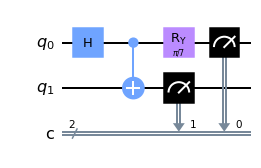

In [7]:
my_chsh_circuits[4].draw('mpl')

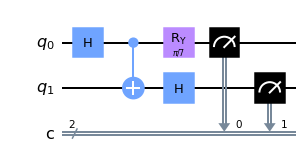

In [8]:
my_chsh_circuits[5].draw('mpl')

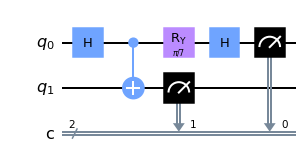

In [9]:
my_chsh_circuits[6].draw('mpl')

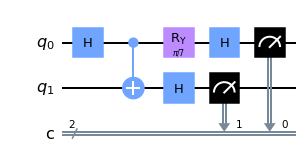

In [10]:
my_chsh_circuits[7].draw('mpl')

These circuits are simply creating a Bell pair, and then measuring each party in a different basis. While Bob ($q_1$) always measures either in the computational basis or the $X$ basis, Alice's measurement basis rotates by the angle $\theta$ with respect to Bob's.

In [11]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
# Execute and get counts
result_ideal = execute(my_chsh_circuits, qasm_sim).result()
#print(result_ideal.get_counts())

CHSH1_ideal= compute_chsh_witness(result_ideal.get_counts())
print(CHSH1_ideal)

[2.00390625, 0.974609375, -0.26953125, -1.435546875, -2.375, -2.736328125, -2.66015625, -1.96875, -0.966796875, 0.33984375, 1.447265625, 2.376953125, 2.7734375, 2.58203125, 2.05078125]


## Once we have the circuit we build the Noise models and apply them to the circuit

In [12]:
# Some useful functions
def getSQGateExecutionTime(gate, backend, names):
    '''Returns the average execution time of the single-qubit type gates we are interested in.'''
    # Single qubit gates
    s = [0]*len(names)
    for i in range(0,len(names)):
        #s[i] = backend.properties().gate_length(gate, [i])
        s[i] = backend.properties().gate_length(gate, [i])
    return (np.mean(s)*(10**9))
#backend = provider.backend.ibmq_16_melbourne
#backend = provider.backend.ibmq_lima
backend = provider.backend.ibmq_belem
#backend = provider.backend.ibmqx2
print(backend.properties().gate_length('cx',(0,1)))
print(backend.properties().readout_length(2))
names = [0, 1, 2] # The single-qubit gates that we are interested in
gate = "id"
s = getSQGateExecutionTime(gate,backend,names)
print(s)
print(backend.properties().gate_length("x",0)*(10**9))
def getDecoherenceTimes(data):
    '''Returns the thermal relaxation time T1 and the qubit dephasing time T2, as given by IBMQ.'''
    t1er = data["T1 (us)"].tolist()
    
    t2er = data["T2 (us)"].tolist()
    

    #for i in range(0, len(t1er)):
        #t1er[i] = float(t1er[i] + "e3")
        #t2er[i] = float(t2er[i] + "e3") ##Check order of magnitude????

    T1s = np.array(t1er)
    T2s = np.array(t2er)
    
    # Check for error in IBMQ's measurements (i.e it must always be T2 <= 2T1)
    c = 0
    for i in range(0,len(T1s)):
        if (T2s[i] > 2*T1s[i]):
            c = 1
            print("ERROR: incompatible decay rates - Qubit Q" + str(i) + ", T2 =", T2s[i], "and T1 =", T1s[i])
    if (c == 0):
        print(r'Checking decoherence times: all ok')

    return T1s*1000,T2s*1000
def getSQGateExecutionTime(gate, backend, names):
    '''Returns the average execution time of the single-qubit type gates we are interested in.'''
    # Single qubit gates
    s = [0]*len(names)
    for i in range(0,len(names)):
        s[i] = backend.properties().gate_length(gate, [i])

    return (np.mean(s)*(10**9))
def getTQGateExecutionTime(gate, backend, graph):
    '''Returns the average execution time of the two-qubit type gates in the circuit.'''
    # Two qubit gates

    t = [0]*len(graph)
    for i in range(0,len(graph)):
        t[i] = backend.properties().gate_length('cx', graph[i])

    return (np.mean(t)*(10**9))
def getMeasExecutionTime(backend, names):
    '''Returns the average measure time of the single-qubit we are interested in.'''
    # Single qubit gates
    s = [0]*len(names)
    for i in range(0,len(names)):
        s[i] = backend.properties().readout_length(i)
    return (np.mean(s))
def getSQGateErrorAvg(gate, backend, names):
    '''Returns the average execution time of the single-qubit type gates we are interested in.'''
    # Single qubit gates
    s = [0]*len(names)
    for i in range(0,len(names)):
        s[i] = backend.properties().gate_error(gate, [i])

    return (np.mean(s))
def getTQGateErrorAvg(gate, backend, graph):
    '''Returns the average execution time of the two-qubit type gates in the circuit.'''
    # Two qubit gates

    t = [0]*len(graph)
    for i in range(0,len(graph)):
        t[i] = backend.properties().gate_error('cx', graph[i])

    return (np.mean(t))
def getMeasErorrAvg(backend, names):
    '''Returns the average measure time of the single-qubit we are interested in.'''
    # Single qubit gates
    s = [0]*len(names)
    for i in range(0,len(names)):
        s[i] = backend.properties().readout_error(i)
    return (np.mean(s))

8.106666666666666e-07
5.35111111111111e-06
35.55555555555556
35.55555555555556


## DEPOLARIZING CHANNEL USING ONLY ONE PROPERTY OF THE QUBIT

In [13]:
# Create the error channels

prob_1 = backend.properties().gate_error('x',1)
print(prob_1)
prob_2 = backend.properties().gate_error('cx',(0,1))
print(prob_2)
p_error = backend.properties().readout_error(0)
print(p_error)

print(backend.properties().readout_length(0))

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)


# State preparation and Measurement (SPAM) Channel

bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])



#time_reset = 1000  # 1 microsecond
#time_measure = 1000 # 1 microsecond
noise_thermal = NoiseModel()

noise_thermal.add_all_qubit_quantum_error(bit_flip, "reset")
noise_thermal.add_all_qubit_quantum_error(bit_flip, "measure")
noise_thermal.add_all_qubit_quantum_error(error_1, ["h","x","z"])
noise_thermal.add_all_qubit_quantum_error(error_2, "cx")






0.00024682387181495813
0.02237066574725277
0.03289999999999993
5.35111111111111e-06


In [14]:
## We execute the circuit with this noise model
simulate_ND1 = execute(my_chsh_circuits, backend = Aer.get_backend("qasm_simulator"), basis_gates=noise_thermal.basis_gates, 
                               noise_model=noise_thermal, shots=1024).result()
countsND1 = simulate_ND1.get_counts()

CHSH1_ND1 = compute_chsh_witness(countsND1)
print(CHSH1_ND1)


[1.755859375, 0.767578125, -0.30859375, -1.31640625, -2.068359375, -2.40625, -2.373046875, -1.75, -0.822265625, 0.220703125, 1.310546875, 2.029296875, 2.353515625, 2.263671875, 1.75]


## DEPOLARIZING CHANNEL USING THE PROPERTIES OF EACH QUBIT

In [15]:
# Create the error channels

prob_10 = backend.properties().gate_error('x',0)
print(prob_10)
prob_11 = backend.properties().gate_error('x',1)
print(prob_11)
#prob_12 = backend.properties().gate_error('x',2)

prob_20 = backend.properties().gate_error('cx',(0,1))
#prob_21 = backend.properties().gate_error('cx',(1,2))
p_error0 = backend.properties().readout_error(0)
print(p_error0)
p_error1 = backend.properties().readout_error(1)
print(p_error1)
#p_error2 = backend.properties().readout_error(2)
#print(backend.properties().readout_length(0))

# Depolarizing quantum errors
error_10 = noise.depolarizing_error(prob_10, 1)
error_11 = noise.depolarizing_error(prob_11, 1)
#error_12 = noise.depolarizing_error(prob_12, 1)
error_20 = noise.depolarizing_error(prob_20, 2)
#error_21 = noise.depolarizing_error(prob_20, 2)


# State preparation and Measurement (SPAM) Channel

bit_flip0 = pauli_error([('X', p_error0), ('I', 1 - p_error0)])
bit_flip1 = pauli_error([('X', p_error1), ('I', 1 - p_error1)])
#bit_flip2 = pauli_error([('X', p_error2), ('I', 1 - p_error2)])

noise_thermal = NoiseModel()

noise_thermal.add_quantum_error(bit_flip0, "reset",[0])
noise_thermal.add_quantum_error(bit_flip1, "reset",[1])
#noise_thermal.add_quantum_error(bit_flip2, "reset",[2])
noise_thermal.add_quantum_error(bit_flip0, "measure",[0])
noise_thermal.add_quantum_error(bit_flip1, "measure",[1])
#noise_thermal.add_quantum_error(bit_flip2, "measure",[2])
noise_thermal.add_quantum_error(error_10, ["h","x","z"],[0])
noise_thermal.add_quantum_error(error_11, ["h","x","z"],[1])
#noise_thermal.add_quantum_error(error_12, ["h","x","z"],[2])

noise_thermal.add_quantum_error(error_20, "cx",(0,1))
#noise_thermal.add_quantum_error(error_20, "cx",(1,2))

0.0003623984303560909
0.00024682387181495813
0.03289999999999993
0.02400000000000002


In [16]:
## We execute the circuit with this noise model
simulate_NDD = execute(my_chsh_circuits, backend = Aer.get_backend("qasm_simulator"), basis_gates=noise_thermal.basis_gates, 
                               noise_model=noise_thermal, shots=1024).result()
countsNDD = simulate_NDD.get_counts()

CHSH1_NDD = compute_chsh_witness(countsNDD)
print(CHSH1_NDD)

[1.701171875, 0.7890625, -0.291015625, -1.2890625, -2.1015625, -2.44921875, -2.28125, -1.6953125, -0.837890625, 0.330078125, 1.322265625, 2.03125, 2.392578125, 2.29296875, 1.703125]


## DEPOLARIZING CHANNEL USING AVERAGED PROPERTIES OF THE QUBITS

In [17]:
# Create the error channels

graph = [[0,1]] # The two-qubit gates that we are interested in
names = [0, 1] # The single-qubit gates that we are interested in
# Instruction times (in nanoseconds)
prob_1 = getSQGateErrorAvg('x', backend, names)
print(prob_1)

prob_2 = getTQGateErrorAvg('cx', backend, graph)
print(prob_2)

p_error = getMeasErorrAvg(backend, names)
#print(p_error)

#p_error = backend.properties().readout_error(0)



# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)


# State preparation and Measurement (SPAM) Channel

bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])



#time_reset = 1000  # 1 microsecond
#time_measure = 1000 # 1 microsecond
noise_thermal = NoiseModel()

noise_thermal.add_all_qubit_quantum_error(bit_flip, "reset")
noise_thermal.add_all_qubit_quantum_error(bit_flip, "measure")
noise_thermal.add_all_qubit_quantum_error(error_1, ["h","x","z"])
noise_thermal.add_all_qubit_quantum_error(error_2, "cx")

0.0003046111510855245
0.02237066574725277


In [18]:
## We execute the circuit with this noise model
simulate_NDA = execute(my_chsh_circuits, backend = Aer.get_backend("qasm_simulator"), basis_gates=noise_thermal.basis_gates, 
                               noise_model=noise_thermal, shots=1024).result()
countsNDA = simulate_NDA.get_counts()

CHSH1_NDA = compute_chsh_witness(countsNDA)
print(CHSH1_NDA)

[1.76171875, 0.8046875, -0.234375, -1.365234375, -2.107421875, -2.376953125, -2.314453125, -1.703125, -0.8046875, 0.171875, 1.2734375, 2.09375, 2.466796875, 2.2578125, 1.685546875]


## DEPOLARIZING + THERMAL RELAXATION CHANNELS USING AVERAGED PROPERTIES OF THE QUBITS FOR THE DEPOLARIZING CHANNEL

In [19]:
# Create the error channels
 
prob_10 = backend.properties().gate_error('x',0)
prob_11 = backend.properties().gate_error('x',1)
prob_12 = backend.properties().gate_error('x',2)

prob_20 = backend.properties().gate_error('cx',(0,1))
prob_21 = backend.properties().gate_error('cx',(1,2))
p_error0 = backend.properties().readout_error(0)
p_error1 = backend.properties().readout_error(1)
p_error2 = backend.properties().readout_error(2)
print(backend.properties().readout_length(0))

###
prob_1 = getSQGateErrorAvg('x', backend, names)

prob_2 = getTQGateErrorAvg('cx', backend, graph)
p_error = getMeasErorrAvg(backend, names)
#p_error = backend.properties().readout_error(0)

# Depolarizing quantum errors
error_10 = noise.depolarizing_error(prob_10, 1)
error_11 = noise.depolarizing_error(prob_11, 1)
error_12 = noise.depolarizing_error(prob_12, 1)
error_20 = noise.depolarizing_error(prob_20, 2)
error_21 = noise.depolarizing_error(prob_20, 2)
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 1)


# State preparation and Measurement (SPAM) Channel

bit_flip =  pauli_error([('X', p_error), ('I', 1 - p_error)])
bit_flip0 = pauli_error([('X', p_error0), ('I', 1 - p_error0)])
bit_flip1 = pauli_error([('X', p_error1), ('I', 1 - p_error1)])
bit_flip2 = pauli_error([('X', p_error2), ('I', 1 - p_error2)])

# Thermal Relaxation Channel
#data = pd.read_csv("/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/qnoisecomb-master/ibmq_16_melbourne_calibrations.csv")
data = pd.read_csv("/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/qnoisecomb-master/ibmq_belem_calibrations.csv")
#data = pd.read_csv("/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/qnoisecomb-master/ibmqx2_calibrations.csv")
T1s,T2s = getDecoherenceTimes(data)
# T1 and T2 values for qubits 0-3
#T1s = np.random.normal(50e3, 10e3, 4) # Sampled from normal distribution mean 50 microsec
#T2s = np.random.normal(70e3, 10e3, 4)  # Sampled from normal distribution mean 50 microsec

# Truncate random T2s <= T1s
#T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(4)])
graph = [[0,1], [1,2]] # The two-qubit gates that we are interested in
names = [0, 1, 2] # The single-qubit gates that we are interested in
# Instruction times (in nanoseconds)
time_u1 = 10 # virtual gate
time_x = getSQGateExecutionTime('x', backend, names) # Average of all u2 times
#time_u3 = getSQGateExecutionTime('x', backend, gates) # Average of all u3 times
time_cx = getTQGateExecutionTime('cx', backend, graph) # Average of all cx times
time_reset = getMeasExecutionTime(backend, names)# Average of all meas times
time_measure = getMeasExecutionTime(backend, names)# Average of reset times 
print(time_measure)
#time_reset = 1000  # 1 microsecond
#time_measure = 1000 # 1 microsecond

# QuantumError objects

errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                    for t1, t2 in zip(T1s, T2s)]
print(errors_measure[0])
for i in range(len(errors_measure)):
    errors_measure[i] = bit_flip.compose(errors_measure[i])
errors_x  = [thermal_relaxation_error(t1, t2, time_x)
             for t1, t2 in zip(T1s, T2s)]

for i in range(len(errors_x)):
    errors_x[i] = error_1.compose(errors_x[i])
print(errors_x[0])
#print((error_2.compose(thermal_relaxation_error(T1s[0], T2s[0], time_cx))).expand(error_2.compose(
                 #thermal_relaxation_error(T1s[2], T2s[2], time_cx))))

errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
                 thermal_relaxation_error(t1b, t2b, time_cx))
                  for t1a, t2a in zip(T1s, T2s)]
                   for t1b, t2b in zip(T1s, T2s)]



noise_thermal = NoiseModel()

for j in range(len(T1s)):
        noise_thermal.add_quantum_error(errors_measure[j], "reset", [j])
        noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
        #noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
        noise_thermal.add_quantum_error(errors_x[j], "p", [j])
        noise_thermal.add_quantum_error(errors_x[j], "h", [j])
        noise_thermal.add_quantum_error(errors_x[j], "x", [j])
        noise_thermal.add_quantum_error(errors_x[j], "z", [j])
        #noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
        #noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
        noise_thermal.add_quantum_error(errors_x[j], "u", [j])
        
        for k in range(len(T1s)):
            noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])


        
print(noise_thermal)

5.35111111111111e-06
Checking decoherence times: all ok
5.35111111111111e-06
QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, QasmQobjInstructions = [[{'name': 'id', 'qubits': [0]}]
QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, QasmQobjInstructions = [[{'name': 'kraus', 'qubits': [0], 'params': [array([[-0.99985059+0.j,  0.        +0.j],
       [ 0.        +0.j, -0.99963356+0.j]]), array([[-0.0121063 +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.01210893+0.j]]), array([[0.        +0.j, 0.        +0.j],
       [0.01233854+0.j, 0.        +0.j]]), array([[0.        +0.j, 0.02420992+0.j],
       [0.        +0.j, 0.        +0.j]])]}]
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'p', 'u', 'u3', 'x', 'z']
  Instructions with noise: ['h', 'u', 'p', 'measure', 'x', 'z', 'reset', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('reset', [4]), ('measure', [0]), ('measure', [1]), ('measure',

In [20]:
## We execute the circuit with this noise model
simulate_TR = execute(my_chsh_circuits, backend = Aer.get_backend("qasm_simulator"), basis_gates=noise_thermal.basis_gates, 
                               noise_model=noise_thermal, shots=1024).result()
countsTR = simulate_TR.get_counts()
CHSH1_TR= compute_chsh_witness(countsTR)
print(CHSH1_TR)

[1.751953125, 0.876953125, -0.267578125, -1.33984375, -2.111328125, -2.474609375, -2.373046875, -1.861328125, -0.736328125, 0.228515625, 1.181640625, 2.115234375, 2.462890625, 2.322265625, 1.8203125]


## Run on a real quantum computer

tic = time.time()
#backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   #not b.configuration().simulator and b.status().operational==True))
backend = provider.backend.ibmq_belem
job_real = execute(my_chsh_circuits, backend=backend, shots=1024)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)
CHSH1_real, CHSH2_real = compute_chsh_witness(result_real.get_counts())

## Read data from csv

In [37]:
import json

#data = result_real.get_counts()
#print(len(data))


# Serialize data into file:
#json.dump( data, open( "/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/jobs/belem/Bell/3/4.json", 'w' ) )

# Read data from file:
data = json.load( open( "/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/jobs/belem/Bell/3/3.json" ) )
#data = json.load( open( "/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/jobs/yorktown/Bell/3/3.json" ) )
CHSH1_real= compute_chsh_witness(data)
print(CHSH1_real)

[1.76171875, 0.90234375, -0.166015625, -1.0625, -1.78125, -2.134765625, -2.17578125, -1.779296875, -0.91796875, 0.08984375, 1.1328125, 1.88671875, 2.18359375, 2.14453125, 1.744140625]


In [22]:
data = json.load( open( "/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/jobs/belem/Bell/3/3.json" ) )
print(data)

[{'00': 485, '01': 43, '10': 59, '11': 437}, {'00': 289, '01': 250, '10': 217, '11': 268}, {'00': 263, '01': 264, '10': 286, '11': 211}, {'00': 490, '01': 42, '10': 61, '11': 431}, {'00': 413, '01': 56, '10': 83, '11': 472}, {'00': 181, '01': 331, '10': 316, '11': 196}, {'00': 350, '01': 166, '10': 192, '11': 316}, {'00': 458, '01': 83, '10': 51, '11': 432}, {'00': 400, '01': 106, '10': 130, '11': 388}, {'00': 120, '01': 415, '10': 409, '11': 80}, {'00': 438, '01': 77, '10': 99, '11': 410}, {'00': 401, '01': 109, '10': 116, '11': 398}, {'00': 317, '01': 199, '10': 219, '11': 289}, {'00': 89, '01': 428, '10': 456, '11': 51}, {'00': 451, '01': 40, '10': 66, '11': 467}, {'00': 335, '01': 185, '10': 187, '11': 317}, {'00': 231, '01': 274, '10': 301, '11': 218}, {'00': 83, '01': 436, '10': 470, '11': 35}, {'00': 433, '01': 52, '10': 63, '11': 476}, {'00': 250, '01': 271, '10': 299, '11': 204}, {'00': 149, '01': 326, '10': 422, '11': 127}, {'00': 141, '01': 394, '10': 421, '11': 68}, {'00': 

## Use of similarity measures to compare the curves

0.25547791569350425 0.259765625 0.8603440818912869 3.039409408188348 1.97265625


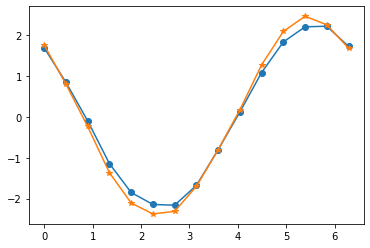

In [23]:
import similaritymeasures

exp_data = np.zeros((15, 2))
num_data = np.zeros((15, 2))

exp_data[:, 0] = theta_vec
exp_data[:, 1] = CHSH1_real

num_data[:, 0] = theta_vec
num_data[:, 1] = CHSH1_NDA

# quantify the difference between the two curves using PCM
pcm = similaritymeasures.pcm(exp_data, num_data)

# quantify the difference between the two curves using
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(exp_data, num_data)

# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(exp_data, num_data)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl = similaritymeasures.curve_length_measure(exp_data, num_data)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw, d = similaritymeasures.dtw(exp_data, num_data)

# print the results
print(pcm, df, area, cl, dtw)

# plot the data
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], 'o-')
plt.plot(num_data[:, 0],num_data[:, 1], '*-')
plt.show()

0.22680500289761554 0.40234375 0.9874453471732458 2.5171661510355556 2.23828125


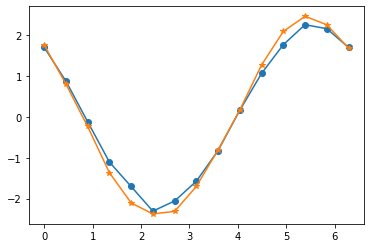

In [24]:
import similaritymeasures

# Read data from file:
data = json.load( open( "/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/jobs/belem/Bell/2/2.json" ) )
#data = json.load( open( "/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/jobs/yorktown/Bell/2/2.json" ) )
#print(data)
CHSH1_real2= compute_chsh_witness(data)


exp_data = np.zeros((15, 2))
num_data = np.zeros((15, 2))

exp_data[:, 0] = theta_vec
exp_data[:, 1] = CHSH1_real2

num_data[:, 0] = theta_vec
num_data[:, 1] = CHSH1_NDA

# quantify the difference between the two curves using PCM
pcm = similaritymeasures.pcm(exp_data, num_data)

# quantify the difference between the two curves using
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(exp_data, num_data)

# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(exp_data, num_data)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl = similaritymeasures.curve_length_measure(exp_data, num_data)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw, d = similaritymeasures.dtw(exp_data, num_data)

# print the results
print(pcm, df, area, cl, dtw)

# plot the data
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], 'o-')
plt.plot(num_data[:, 0],num_data[:, 1], '*-')
plt.show()

0.2180157159715605 0.26171875 0.8927768185494427 2.6639986412851417 2.03125


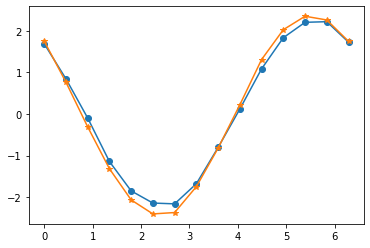

In [25]:

exp_data = np.zeros((15, 2))
num_data = np.zeros((15, 2))

exp_data[:, 0] = theta_vec
exp_data[:, 1] = CHSH1_real

num_data[:, 0] = theta_vec
num_data[:, 1] = CHSH1_ND1

# quantify the difference between the two curves using PCM
pcm = similaritymeasures.pcm(exp_data, num_data)

# quantify the difference between the two curves using
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(exp_data, num_data)

# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(exp_data, num_data)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl = similaritymeasures.curve_length_measure(exp_data, num_data)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw, d = similaritymeasures.dtw(exp_data, num_data)

# print the results
print(pcm, df, area, cl, dtw)

# plot the data
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], 'o-')
plt.plot(num_data[:, 0],num_data[:, 1], '*-')
plt.show()

0.19798932586066298 0.36328125 1.0172484024807367 1.768889145960924 2.31640625


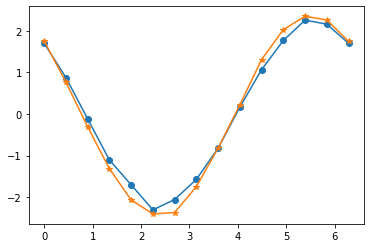

In [26]:
# Read data from file:
data = json.load( open( "/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/jobs/belem/Bell/2/2.json" ) )
#data = json.load( open( "/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/jobs/yorktown/Bell/2/2.json" ) )
#print(data)
CHSH1_real2= compute_chsh_witness(data)

exp_data = np.zeros((15, 2))
num_data = np.zeros((15, 2))

exp_data[:, 0] = theta_vec
exp_data[:, 1] = CHSH1_real2

num_data[:, 0] = theta_vec
num_data[:, 1] = CHSH1_ND1

# quantify the difference between the two curves using PCM
pcm = similaritymeasures.pcm(exp_data, num_data)

# quantify the difference between the two curves using
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(exp_data, num_data)

# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(exp_data, num_data)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl = similaritymeasures.curve_length_measure(exp_data, num_data)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw, d = similaritymeasures.dtw(exp_data, num_data)

# print the results
print(pcm, df, area, cl, dtw)

# plot the data
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], 'o-')
plt.plot(num_data[:, 0],num_data[:, 1], '*-')
plt.show()

0.2394201360146426 0.3046875 0.9129377089045096 2.9384264341875928 2.05078125


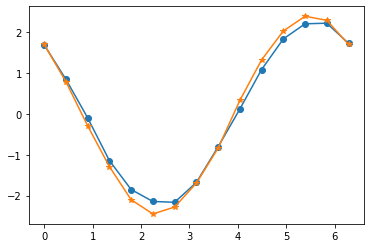

In [27]:

exp_data = np.zeros((15, 2))
num_data = np.zeros((15, 2))

exp_data[:, 0] = theta_vec
exp_data[:, 1] = CHSH1_real

num_data[:, 0] = theta_vec
num_data[:, 1] = CHSH1_NDD

# quantify the difference between the two curves using PCM
pcm = similaritymeasures.pcm(exp_data, num_data)

# quantify the difference between the two curves using
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(exp_data, num_data)

# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(exp_data, num_data)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl = similaritymeasures.curve_length_measure(exp_data, num_data)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw, d = similaritymeasures.dtw(exp_data, num_data)

# print the results
print(pcm, df, area, cl, dtw)

# plot the data
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], 'o-')
plt.plot(num_data[:, 0],num_data[:, 1], '*-')
plt.show()

0.30128961248976766 0.330078125 1.0610764249917568 3.2794018009678605 2.439453125


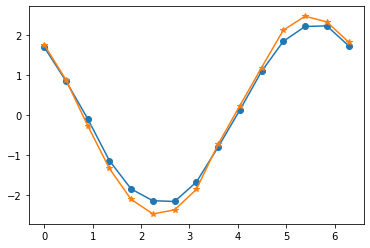

In [28]:
exp_data = np.zeros((15, 2))
num_data = np.zeros((15, 2))

exp_data[:, 0] = theta_vec
exp_data[:, 1] = CHSH1_real

num_data[:, 0] = theta_vec
num_data[:, 1] = CHSH1_TR

# quantify the difference between the two curves using PCM
pcm = similaritymeasures.pcm(exp_data, num_data)

# quantify the difference between the two curves using
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(exp_data, num_data)

# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(exp_data, num_data)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl = similaritymeasures.curve_length_measure(exp_data, num_data)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw, d = similaritymeasures.dtw(exp_data, num_data)

# print the results
print(pcm, df, area, cl, dtw)

# plot the data
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], 'o-')
plt.plot(num_data[:, 0],num_data[:, 1], '*-')
plt.show()

Now we plot the results.

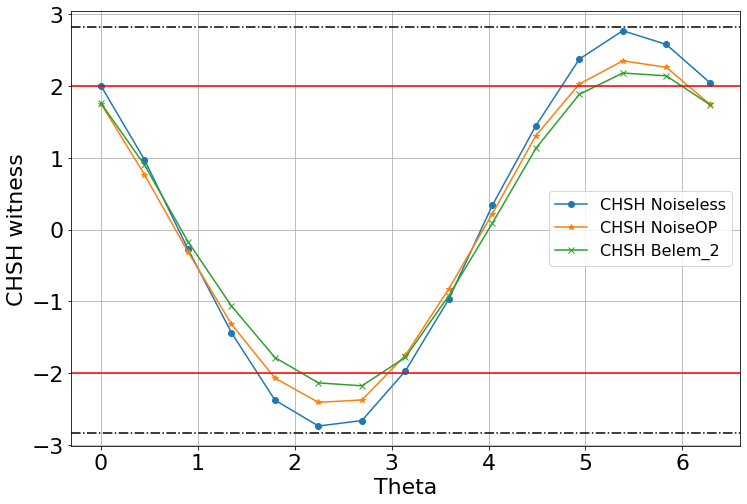

In [41]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 22})
plt.plot(theta_vec,CHSH1_ideal,'o-',label = 'CHSH Noiseless')
#plt.plot(theta_vec,CHSH2_ideal,'o-',label = 'CHSH2 Noiseless')

plt.plot(theta_vec,CHSH1_ND1,'*-',label = 'CHSH NoiseOP')
#plt.plot(theta_vec,CHSH2_ND1,'*-',label = 'CHSH2 NoiseD1')


#plt.plot(theta_vec,CHSH1_TR,'*-',label = 'CHSH NoiseTR')

#plt.plot(theta_vec,CHSH1_NDD,'D-',label = 'CHSH NoiseSP')
#plt.plot(theta_vec,CHSH2_NDD,'D-',label = 'CHSH2 NoiseDD')

#plt.plot(theta_vec,CHSH1_NDA,'+-',label = 'CHSH NoiseAP')
#plt.plot(theta_vec,CHSH2_NDA,'+-',label = 'CHSH2 NoiseDA')

#plt.plot(theta_vec,CHSH1_real,'x-',label = 'CHSH IBMqx2_2')
#plt.plot(theta_vec,CHSH2_real,'x-',label = 'CHSH2 IBMqx2')

plt.plot(theta_vec,CHSH1_real,'x-',label = 'CHSH Belem_2')
#plt.plot(theta_vec,CHSH2_real,'x-',label = 'CHSH2 Belem')

plt.grid(which='major',axis='both')
plt.rcParams.update({'font.size': 16})
plt.legend()
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')
plt.axhline(y=np.sqrt(2)*2, color='k', linestyle='-.')
plt.axhline(y=-np.sqrt(2)*2, color='k', linestyle='-.')
plt.xlabel('Theta')
plt.ylabel('CHSH witness')
plt.savefig("/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/Plots/belem/CHSH/MEMORIA/NEW/OP2B")
#plt.savefig("/Users/rgomezlu/Google_Drive/Màster/TFM/Programació/Plots/yorktown/CHSH/MEMORIA/SP2Y")

Note what happened! There are some particular combination of measurement bases for which $|CHSH| \geq 2$. How is this possible? Let's look at our entangled bipartite system. It is easy to show that if $|\psi \rangle = 1/\sqrt{2} (|00\rangle + |11\rangle)$, then the expectation value $\langle AB \rangle = \langle \psi|A \otimes B| \psi \rangle = -\cos \theta_{AB}$ where $\theta_{AB}$ is the angle between the measurement bases $A$ and $B$. Therefore, for the particular choice of bases $A = 1/\sqrt{2}(\sigma_z - \sigma_x)$ and $a = 1/\sqrt{2}(\sigma_z + \sigma_x)$, letting Bob measure with $B=\sigma_z$ and $b=\sigma_x$, we see that $|\langle CHSH1 \rangle| = 2\sqrt{2} > 2$. It can also be shown that $2\sqrt{2}$ is the maximum possible value attainable, even in the quantum case (dash-dotted line in the plot).

The above inequality is called CHSH after Clauser, Horne, Shimony, and Holt, and it is the most popular way of presenting the original inequality from Bell.

The fact that we violated the CHSH inequality in our real device is of significance. Just a decade ago such an experiment would have been of great impact. Nowadays, quantum devices have become significantly better and these results can be replicated easily in state-of-the-art hardware. However, there are a number of loopholes that have to be closed when violating the inequality in order to claim that either locality or realism have been disproven. These are the detection loophole (where our detector is faulty and fails to provide meaningful statistics) and the locality/causality loophole (where the two parts of the entangled system are separated by a distance smaller than the distance covered by the light in the time it takes to perform a measurement). Given we can generate entangled pairs with high fidelity and every measurement yields a result (this is, no measured particle is "lost"), we have closed the detection loophole in our experiments above. However, given the distance between our qubits (a few mm) and the time it takes to perform a measurement (order of $\mu$s), we cannot claim we closed the causality loophole.

### Exercise

Consider a game where Alice and Bob are put in separate rooms and each is given a bit $x$ and $y$, respectively. These bits are chosen at random and independently of each other. On receiving the bit each of them replies with a bit of their own, $a$ and $b$. Now, Alice and Bob win the game if $a$ and $b$ are different whenever $x=y=1$ and equal otherwise. It is easy to see that the best possible strategy for Alice and Bob is to always give $a=b=0$ (or $1$). With this strategy, Alice and Bob can win the game at most 75% of the time. 

Imagine Alice and Bob are allowed to share an entangled two-qubit state. Is there a strategy they can use that would give them a better chance of winning than 75%? (Remember that they can agree upon any strategy beforehand, but once they are given the random bits they cannot communicate anymore. They can take their respective parts of the entangled pair with them at all times, of course.)

## Chisquared test

In [30]:
import scipy
from scipy.stats import chisquare

s=chisquare(CHSH1_real,CHSH1_ND1)
print(s)

Power_divergenceResult(statistic=-0.11817864046014093, pvalue=1.0)


In [31]:
s=chisquare(CHSH1_real,CHSH1_NDD)
print(s)

Power_divergenceResult(statistic=-0.005571002270563092, pvalue=1.0)


In [32]:
s=chisquare(CHSH1_real,CHSH1_NDA)
print(s)

Power_divergenceResult(statistic=-0.0727730161310539, pvalue=1.0)


In [33]:
s=chisquare(CHSH1_real,CHSH1_TR)
print(s)

Power_divergenceResult(statistic=-0.1228765691240396, pvalue=1.0)
